<h1>LAB 5</h1>

In [1]:
from IPython.display import display, HTML

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
import matplotlib.pyplot as plt

<h3>TASK 1</h3>

In [3]:
task1_text_html = '<ol><li>На вход передатчика подается некоторый сигнал во времени. В качестве сигнала возможно рассмотреть сигнал прямоугольных периодических импульсов.</li><li>Реализовать свертку сигнала с некоторым ядром во временной области. В качестве ядра свертки использовать (а) y=A•exp(-x^2), (б) любую линейную функцию.</li></ol>'
task1_hide_prim = '<div id="div_text_1" style="display:none">Замечание: Для реализации свертки можно использовать готовую встроенную функцию numpy: convolve(signal,kernel)</div> '
js_task1_html = '<script>function myFunction() {var x = document.getElementById("div_text_1"); y = document.getElementById("button_text1"); if (x.style.display === "none") { x.style.display = "block"; y.innerHTML="Скрыть замечание"; } else { x.style.display = "none"; y.innerHTML="Показать замечание";}}</script>'
button_task1_html = '<button id="button_text1" onclick="myFunction()">Показать замечание</button>'

display(HTML(js_task1_html))
display(HTML(task1_text_html))
display(HTML(task1_hide_prim))
display(HTML(button_task1_html))

In [146]:
def sqr_signal (x):
    a = 1.0
    T = 2
    if x < 0:
        x = abs(x) + float(T)/2
    place = x - float(T * (int(x)//T))
    if (place >= 1.0):
        return (-a)
    else:
        return (a)


def kernel_1 (x):
    a = 1.0
    return a * np.exp(-(x **2))

def kernel_2 (x):
    k = -1.0
    b = 0
    return k * x + b

def kernel_3 (x):
    a = 1.0
    f = 0.5
    return a * np.cos(f*2*np.pi*x)

signal = np.vectorize(sqr_signal)
vec_kern_1 = np.vectorize(kernel_1)
vec_kern_2 = np.vectorize(kernel_2)
vec_kern_3 = np.vectorize(kernel_3)

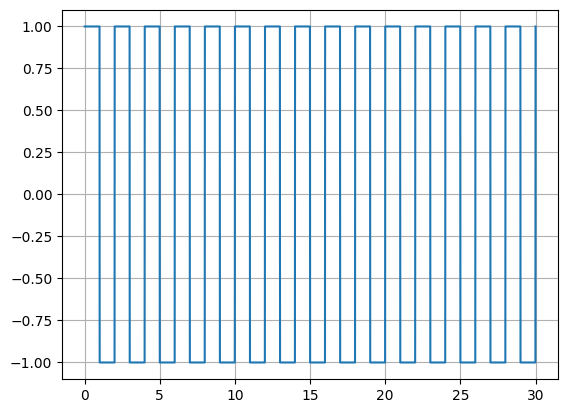

In [147]:
x = np.arange(0, 30.01, 0.01)
y = signal(x)

plt.plot(x,y)
plt.grid()

In [148]:
t = 1.0 #временная область свертки

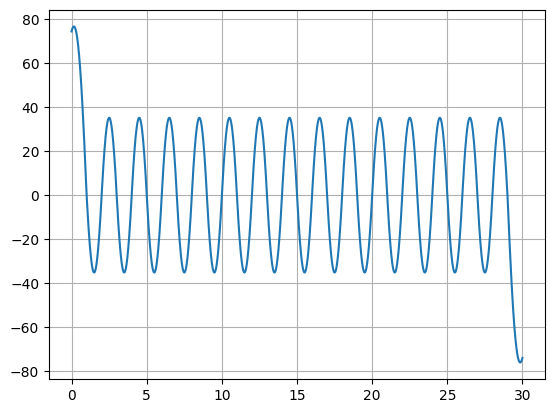

In [149]:
xkern = np.arange(-1.0, t, 0.01)
ykern = vec_kern_1(xkern)

xconv = x
yconv = np.convolve(y, ykern, 'same')

plt.plot(xconv,yconv)
#plt.plot(xkern,ykern)
plt.grid()

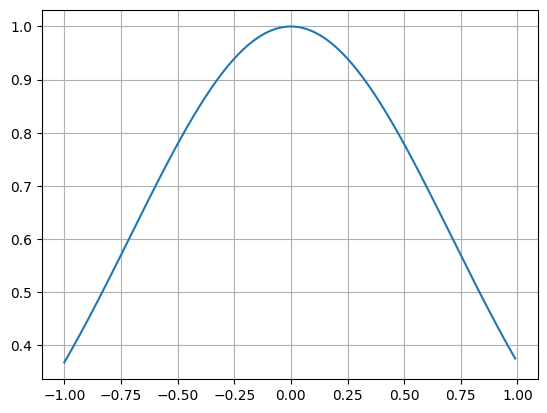

In [150]:
plt.plot(xkern,ykern)
plt.grid()

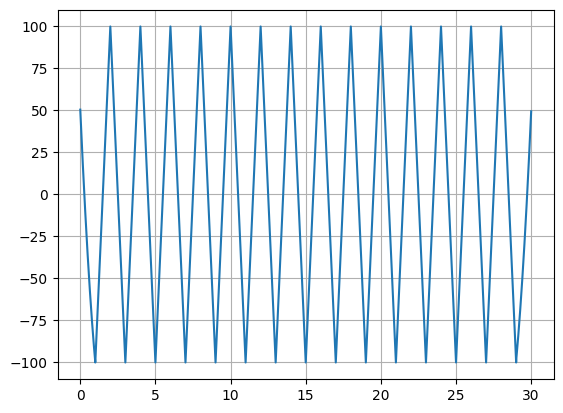

In [151]:
xkern = np.arange(-1.0, t, 0.01)
ykern = vec_kern_2(xkern)

xconv = x
yconv = np.convolve(y, ykern, 'same')

plt.plot(xconv,yconv)
#plt.plot(xkern,ykern)
plt.grid()

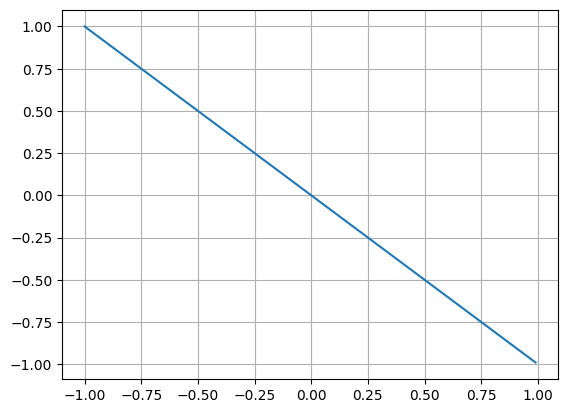

In [152]:
plt.plot(xkern,ykern)
plt.grid()

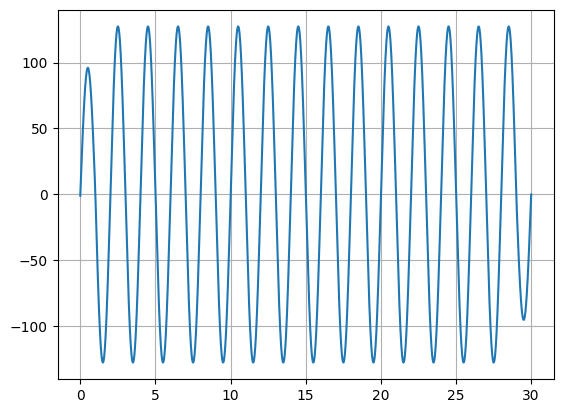

In [153]:
xkern = np.arange(-1, t, 0.01)
ykern = vec_kern_3(xkern)

xconv = x
yconv = np.convolve(y, ykern, 'same')

plt.plot(xconv,yconv)
#plt.plot(xkern,ykern)
plt.grid()

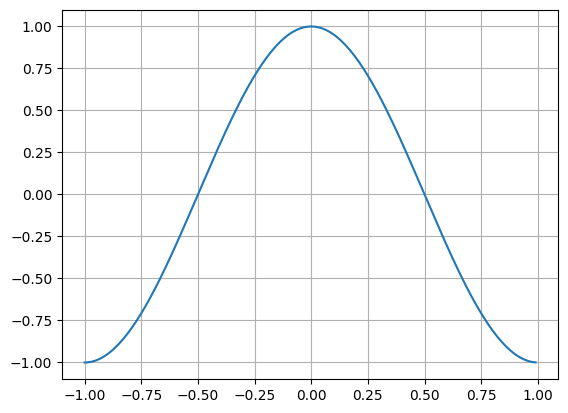

In [154]:
plt.plot(xkern,ykern)
plt.grid()

<h3>TASK 2</h3>

Чтобы разобраться в алгоритме свертки двух сигналов – реализуйте свой
алгоритм, осуществляющий свертку сигнала с произвольным ядром.

<h3>TASK 3</h3>

Для любого выбранного Вами ядра свертки убедиться, что свертка во временной
области эквивалентна умножению в частотной области (теорема о свертке).).

In [155]:
t = 4.0 #временная область свертки

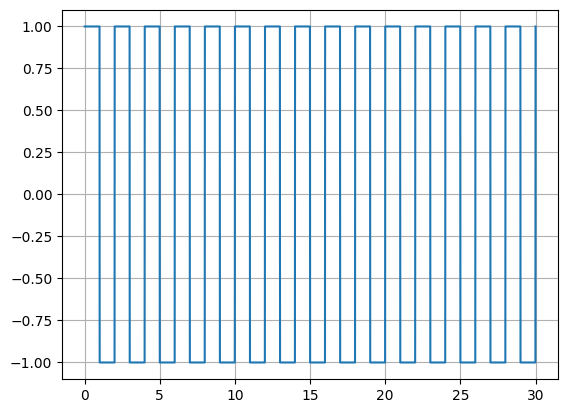

In [156]:
x = np.arange(0, 30.01, 0.01)
y = signal(x)

plt.plot(x,y)
plt.grid()

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

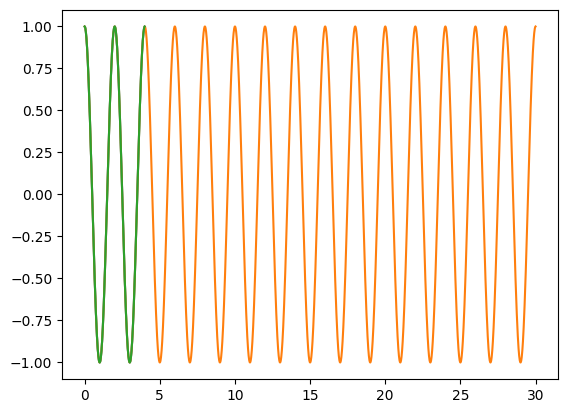

In [157]:
xkern = np.arange(0, t, 0.01)
xkern2 = np.arange(0, 30.01, 0.01)
ykern = vec_kern_3(xkern)
ykern2 = vec_kern_3(xkern2)

plt.plot(xkern,ykern)
plt.plot(xkern2,ykern2)
plt.plot(xkern,ykern)
plt.grid

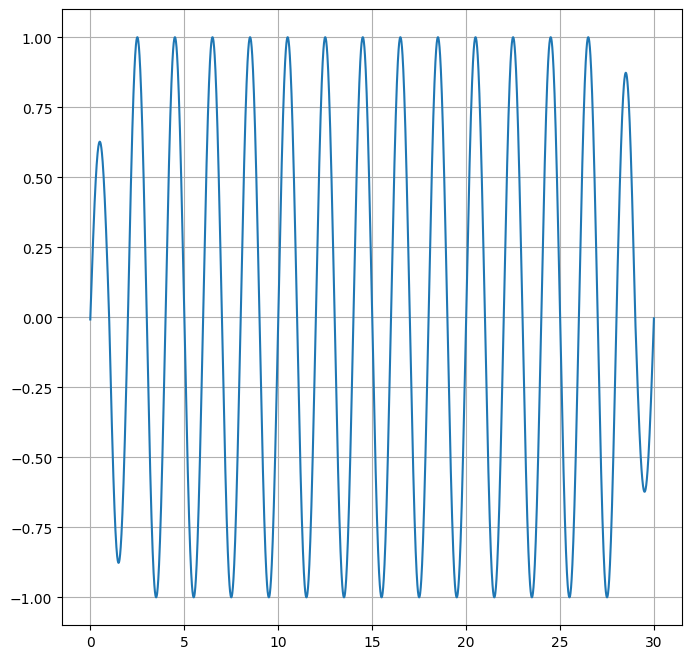

In [158]:
xkern = np.arange(0, t, 0.01)
ykern = vec_kern_3(xkern)

xconv = x
yconv = np.convolve(y, ykern, 'same')
yconv = yconv/np.max(yconv)

fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xconv,yconv)
#plt.plot(xkern,ykern)
plt.grid()

Text(0, 0.5, 'Амплитуда')

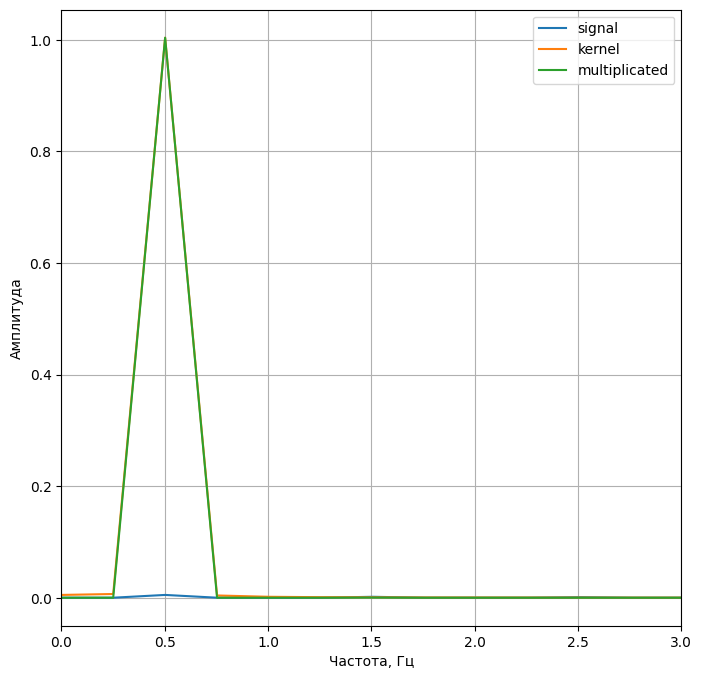

In [159]:

N = 400 # Количество отсчетов
fmax=100 # максимальная частота

x = np.arange(0, 4.01, 0.01)
y = signal(x)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
yff = yff/np.max(yff)

xkern = np.arange(0, 4.01, 0.01)
ykern = vec_kern_3(xkern)
ykern = ykern/np.max(ykern)

xf = np.linspace(0.0, fmax/2, N//2)
yffkern = fft(ykern)

yffmlt = yff*yffkern
#yffmlt = yffmlt/max(yffmlt)

fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) , label= 'signal')
plt.plot(xf, 2.0/N * np.abs(yffkern[0:N//2]), label= 'kernel')
plt.plot(xf, 2.0/N * np.abs(yffmlt[0:N//2]), label= 'multiplicated')
#plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) * np.abs(yffkern[0:N//2]), label= 'multiplicated2')
plt.xlim(0,3)
#plt.ylim(0,2)
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

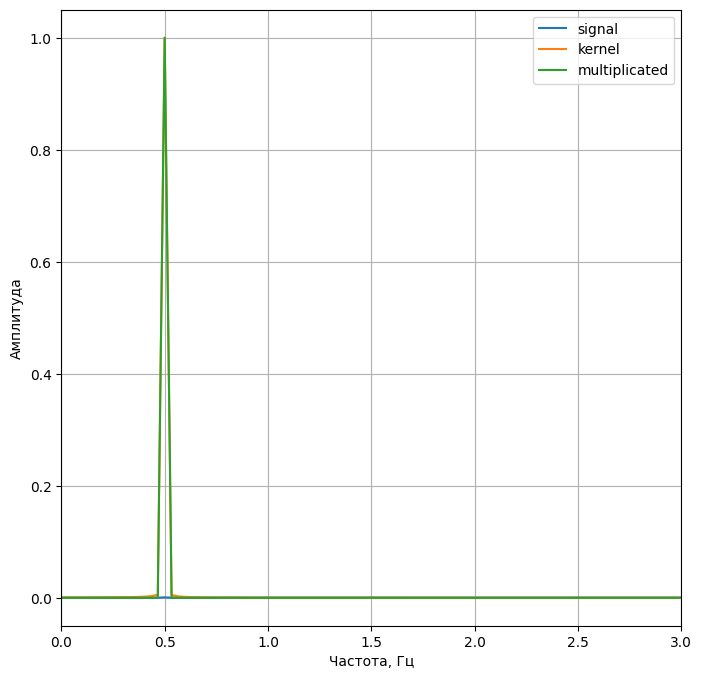

In [160]:

N = 3000 # Количество отсчетов
fmax=100 # максимальная частота

x = np.arange(0, 30.01, 0.01)
y = signal(x)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
yff = yff/np.max(yff)

xkern = np.arange(0, 30.01, 0.01)
ykern = vec_kern_3(xkern)

xf = np.linspace(0.0, fmax/2, N//2)
yffkern = fft(ykern)
yffkern = fft(ykern)

yffmlt = yff*yffkern



fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) , label= 'signal')
plt.plot(xf, 2.0/N * np.abs(yffkern[0:N//2]), label= 'kernel')
plt.plot(xf, 2.0/N * np.abs(yffmlt[0:N//2]), label= 'multiplicated')
#plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]) * np.abs(yffkern[0:N//2]), label= 'multiplicated2')
plt.xlim(0,3)
#plt.ylim(0,2)
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

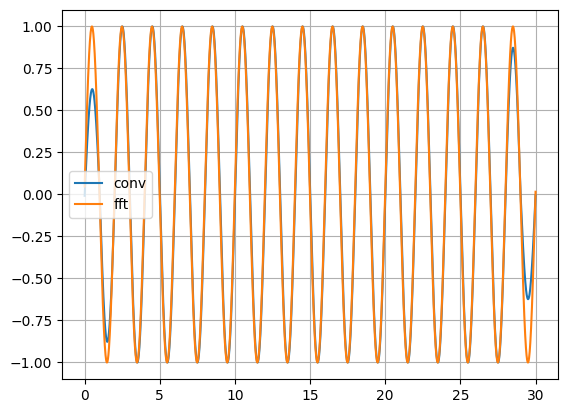

In [161]:
x = np.arange(0, 30.01, 0.01)
yfff = ifft(yffmlt)
yfff = yfff/np.max(yfff)

plt.plot(xconv,yconv, label= 'conv')
plt.plot(x, yfff, label= 'fft')

#plt.ylim(0,5)
plt.legend()
plt.grid()

<h3>TASK 4</h3>

Разобраться в реализации свертки с ядром Гаусса для реализации
сглаживающего фильтра во временной области.

In [32]:
def kernel_gauss(x, disp):
    step1 = np.exp(-(x**2/(2*disp**2)))
    step2 = 1/(np.sqrt(2*np.pi)*disp)
    res = step1*step2
    return res

vec_gaus = np.vectorize(kernel_gauss)

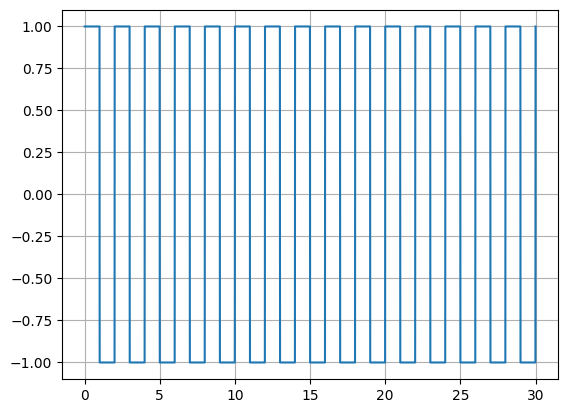

In [16]:
x = np.arange(0, 30.01, 0.01)
y = signal(x)

plt.plot(x,y)
plt.grid()

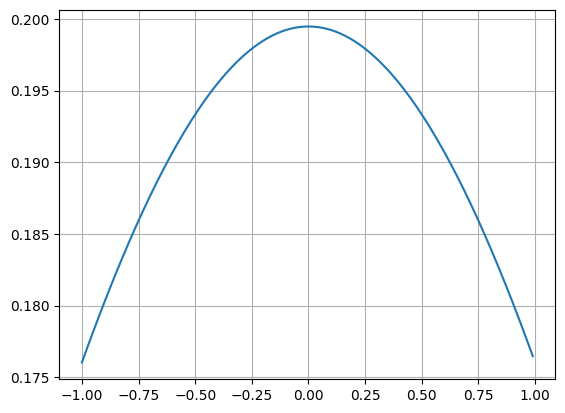

In [17]:
t = 2 # временная область
xkern = np.arange(-(t/2), t/2, 0.01)
ykern = vec_gaus(xkern, 2)

plt.plot(xkern,ykern)
plt.grid()

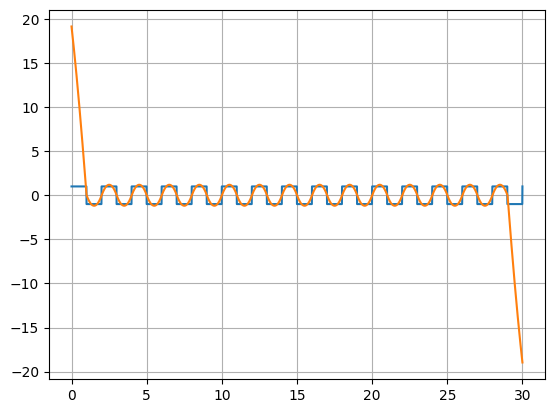

In [18]:


x = np.arange(0, 30.01, 0.01)
y = signal(x)

xconv = x
yconv = np.convolve(y, ykern, 'same')

plt.plot(x,y)
plt.plot(xconv,yconv)
#plt.plot(xkern,ykern)
plt.grid()

<h3>TASK 5</h3>

Реализовать пункт (4) в частотной области. Убедиться, что результаты совпадают.
Настройте параметры ядра Гаусса таким образом, чтобы реализовать: 
<ul>
    <li>узкополосной фильтр</li> 
    <li>фильтр нижних частот</li>
<ul>

Text(0, 0.5, 'Амплитуда')

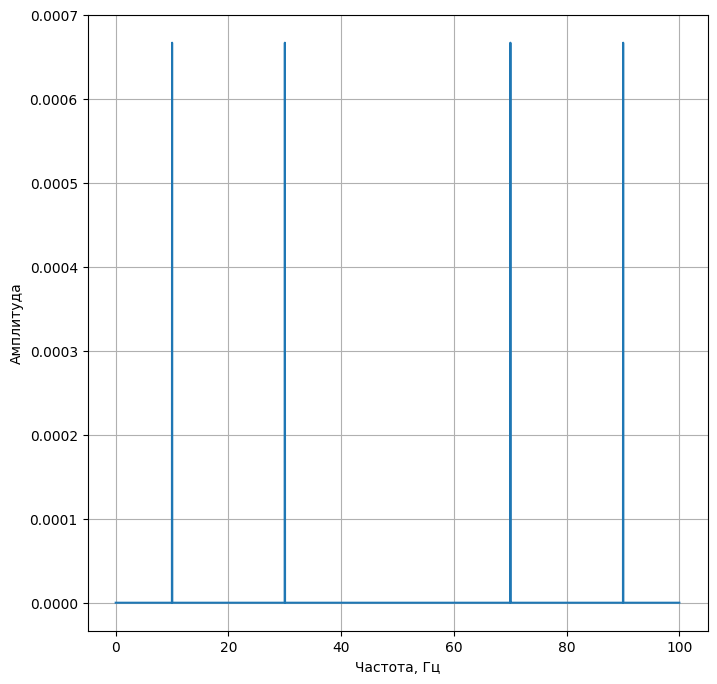

In [74]:
N =3000 # Количество отсчетов
fmax=100 # максимальная частота
f = 10
x = np.arange(0, 30.0, 0.01)
y = np.cos(2*f*np.pi*x) + np.cos(2*3*f*np.pi*x)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
yff = yff/np.max(yff)

xf = np.linspace(0.0, fmax, N)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff))
#plt.xlim(0,5)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

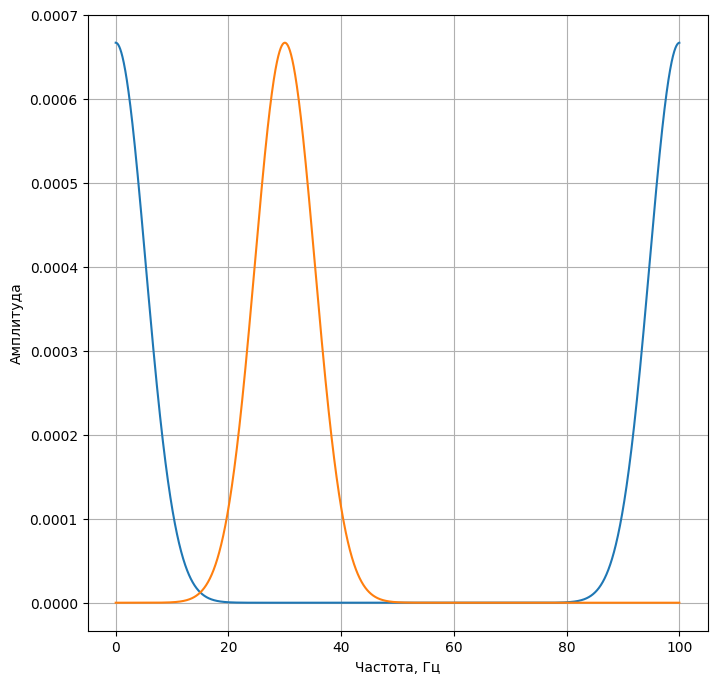

In [80]:
N = 3000 # Количество отсчетов
fmax=100 # максимальная частота


xkern = np.arange(-15.0, 15.0, 0.01)
ykern = vec_gaus(xkern, 0.03)

xf = np.linspace(0.0, fmax/2, N//2)
yffkern = fft(ykern)
yffkern = yffkern/np.max(yffkern)

filt = int(N*30/fmax)
yfc = np.concatenate((yffkern[N-filt:N], yffkern[0:N-filt]), axis=None)

xf = np.linspace(0.0, fmax, N)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yffkern))
plt.plot(xf, 2.0/N * np.abs(yfc))
#plt.xlim(0,5)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

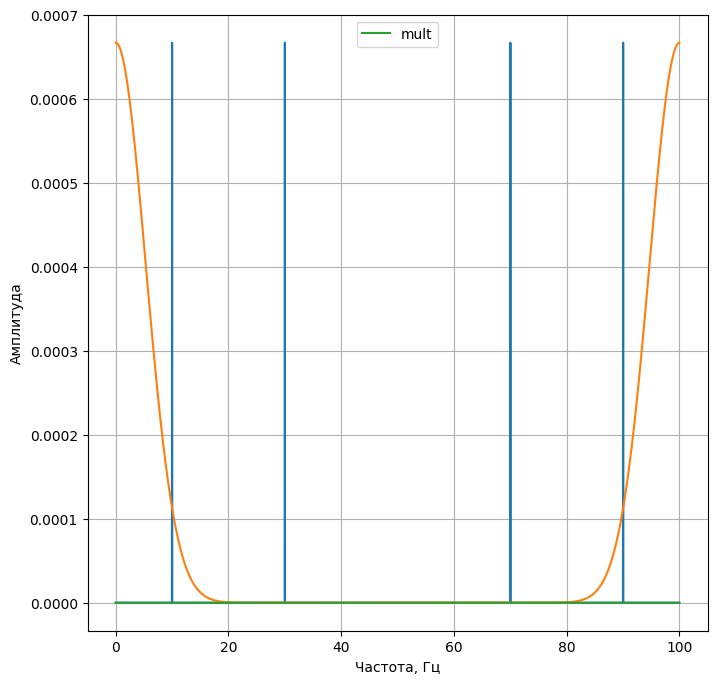

In [81]:
yffmlt = np.abs(yff)* np.abs(ykern)

fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff))
plt.plot(xf, 2.0/N * np.abs(yffkern))
plt.plot(xf, 2.0/N * np.abs(yffmlt) , label='mult')
#plt.xlim(0,5)
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

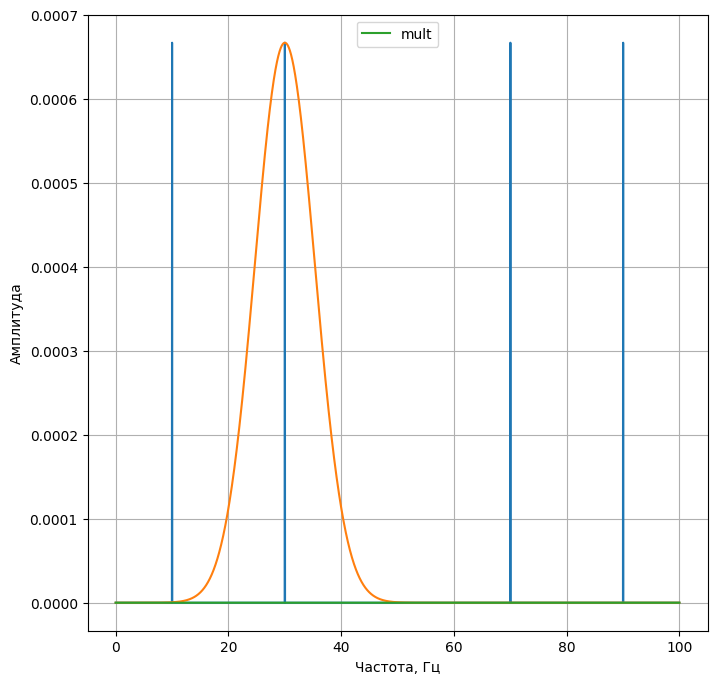

In [82]:
yffmlt2 = np.abs(yff)* np.abs(yfc)

fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff))
plt.plot(xf, 2.0/N * np.abs(yfc))
plt.plot(xf, 2.0/N * np.abs(yffmlt) , label='mult')
#plt.xlim(0,5)
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

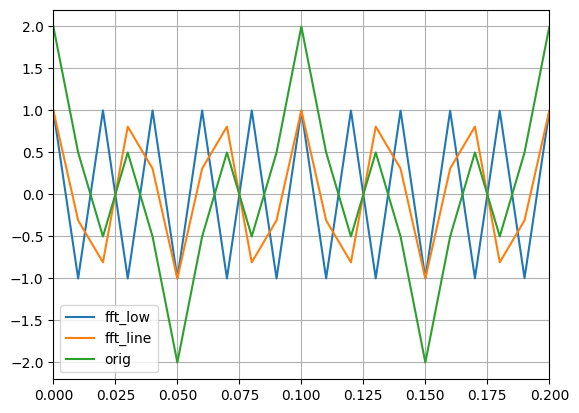

In [85]:
xf = np.arange(0, 30.0, 0.01)
yfff = ifft(yffmlt)
yfff = yfff/np.max(yfff)
yfff2 = ifft(yffmlt2)
yfff2 = yfff2/np.max(yfff2)

x = np.arange(0, 30.0, 0.01)
y = y

#plt.plot(xconv,yconv, label= 'conv')
plt.plot(xf, yfff, label= 'fft_low')
plt.plot(xf, yfff2, label= 'fft_line')
plt.plot(x,y, label= 'orig')
plt.xlim(0,0.2)
plt.legend()
plt.grid()

<h3>TASK 6</h3>

Реализовать полосовой фильтр, используя окно Планка.

In [92]:
def plank_filter(x, e, N):
    if (x == 0):
        return 0
    elif (0 < x and x < e*(N-1)):
        za = e*(N-1) * (1/x + 1/(x-e*(N-1)))
        return 1/(np.exp(za)+1)
    elif (e*(N-1) <= x and x <= (1-e)*(N-1)):
        return 1
    elif ((1-e)*(N-1) < x and x < (N-1)):
        zb = e*(N-1) * (1/(N-1-x) + 1/((1-e)*(N-1)-x))
        return 1/(np.exp(zb)+1)
    else:
        return 0

plank = np.vectorize(plank_filter)

Text(0, 0.5, 'Амплитуда')

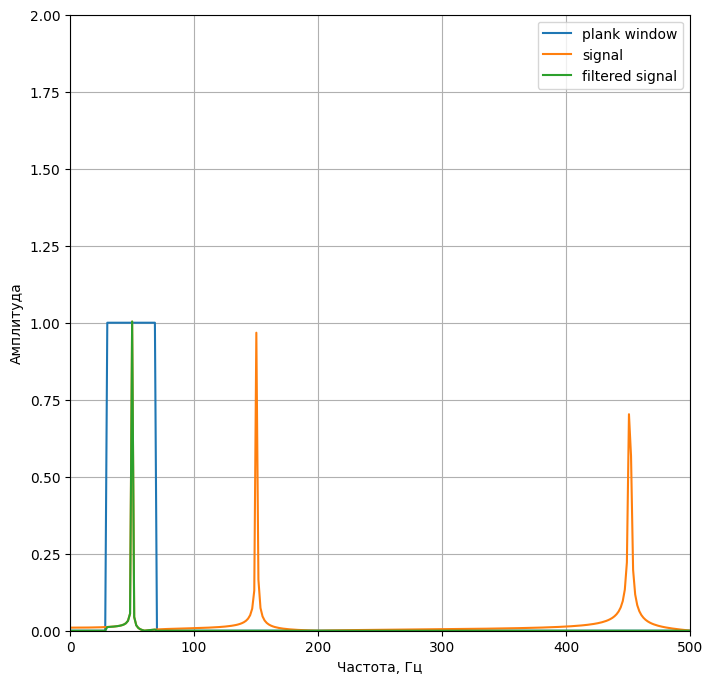

In [107]:

N = 600 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax 
f = 50

x = np.linspace(0.0, N*T, N)
y = (np.cos(f * 2.0*np.pi*x) +  np.cos(3*f * 2.0*np.pi*x) + np.cos(9*f * 2.0*np.pi*x)) 

xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)

fig = plt.figure(figsize=(8,8)) # размер полотна
yf = plank(xf,0.3, 100)
yf2 = np.flip(yf)
yfc = np.concatenate((yf, yf2), axis=None)

xf = np.linspace(0.0, fmax, N)
plt.plot(xf, np.abs(yfc), label= 'plank window')
plt.plot(xf, 2.0/N * np.abs(yff),label= 'signal')
plt.plot(xf, 2.0/N * np.abs(yff) * np.abs(yfc), label= 'filtered signal')
plt.ylim(0,2)
plt.xlim(0,500)
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

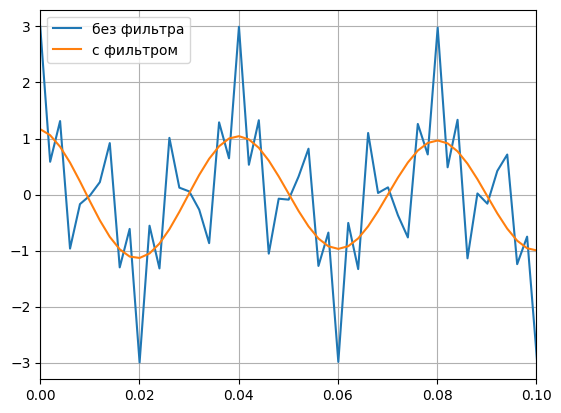

In [103]:
x = np.linspace(0.0, 2*N*T, N)
yfff = ifft(yff)

y =  (yff) * (yfc)
yflt = ifft(y)

plt.plot(x, yfff, label= 'без фильтра')
plt.plot(x, yflt, label= 'с фильтром')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()

<h3>TASK 7</h3>

Сравнить результат фильтрации зашумленного сигнала при использовании ядра
Гаусса и окна Планка.

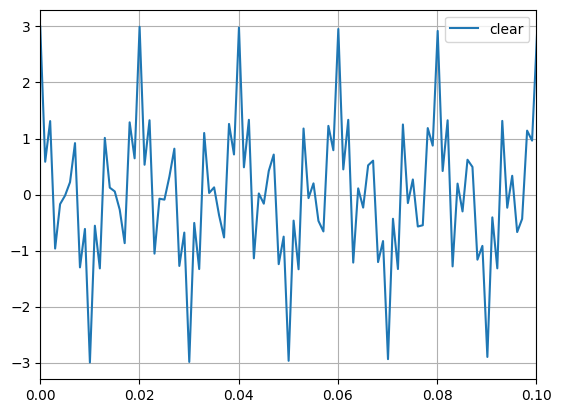

In [95]:
import random as rm
def noise(x):
    a = 2
    if rm.random() >= 0.5:
        return a*rm.random()
    else:
        return -a*rm.random() 


fnoise = np.vectorize(noise)

N = 600 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax 
f = 50

x = np.linspace(0.0, N*T, N)
y = (np.cos(f * 2.0*np.pi*x) +  np.cos(3*f * 2.0*np.pi*x) + np.cos(9*f * 2.0*np.pi*x))
plt.plot(x,y, label= 'clear')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()




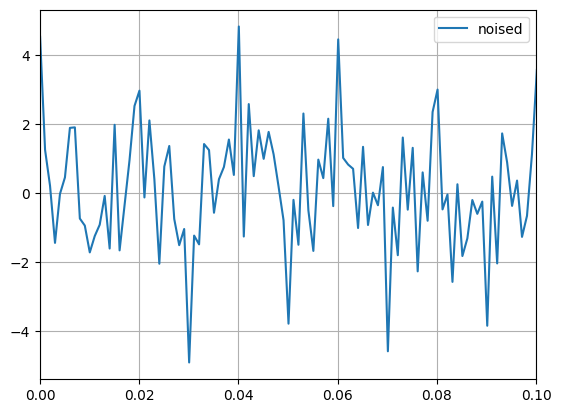

In [96]:
yn = (np.cos(f * 2.0*np.pi*x) +  np.cos(3*f * 2.0*np.pi*x) + np.cos(9*f * 2.0*np.pi*x)) + fnoise(x)
plt.plot(x,yn, label= 'noised')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()

Text(0, 0.5, 'Амплитуда')

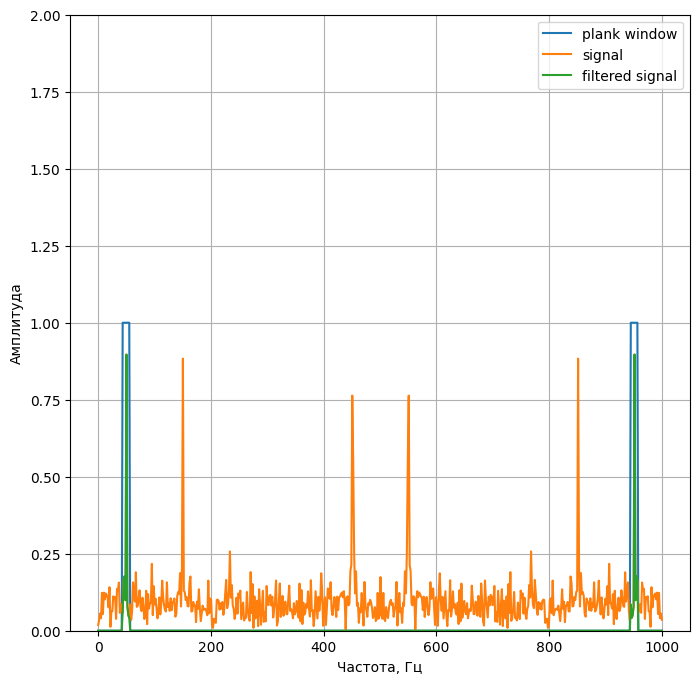

In [140]:

N = 600 # Количество отсчетов
fmax=1000 # максимальная частота

xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(yn)


yf = plank(xf,0.45, 100)
yf2 = np.flip(yf)
yfc = np.concatenate((yf, yf2), axis=None)
yf_plank = yfc

fig = plt.figure(figsize=(8,8)) # размер полотна
xf = np.linspace(0.0, fmax, N)
plt.plot(xf, np.abs(yfc), label= 'plank window')
plt.plot(xf, 2.0/N * np.abs(yff),label= 'signal')
plt.plot(xf, 2.0/N * np.abs(yff) * np.abs(yfc), label= 'filtered signal')
plt.ylim(0,2)
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

<Figure size 800x800 with 0 Axes>

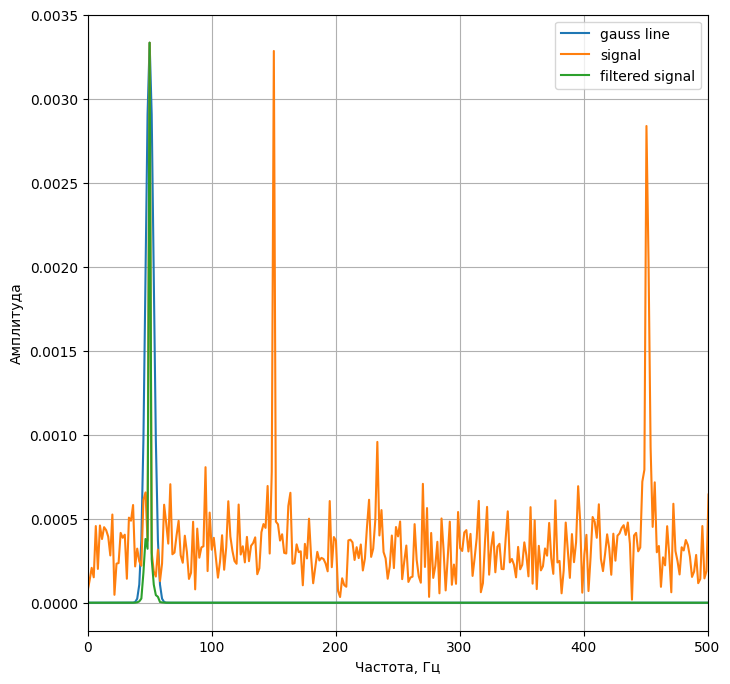

In [142]:
N = 600 # Количество отсчетов
fmax=1000 # максимальная частота

xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(yn)
yff = yff/np.max(yff)

fig = plt.figure(figsize=(8,8)) # размер полотна
yf = plank(xf,0.3, 100)
yf2 = np.flip(yf)
yfc = np.concatenate((yf, yf2), axis=None)

xkern = np.arange(-3.0, 3.0, 0.01)
ykern = vec_gaus(xkern, 0.5)

xf = np.linspace(0.0, fmax/2, N//2)
yffkern = fft(ykern)
yffkern = yffkern/np.max(yffkern)

f_filt = 50
cut = int(N*f_filt/fmax)
yfc2 = np.concatenate((yffkern[N-cut:N], yffkern[0:N-cut]), axis=None)
yf_gauss = yfc2


fig = plt.figure(figsize=(8,8)) # размер полотна
xf = np.linspace(0.0, fmax, N)
plt.plot(xf, 2.0/N * np.abs(yfc2), label= 'gauss line')
plt.plot(xf, 2.0/N * np.abs(yff),label= 'signal')
plt.plot(xf, 2.0/N * np.abs(yff) * np.abs(yfc2), label= 'filtered signal')
plt.xlim(0,500)
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

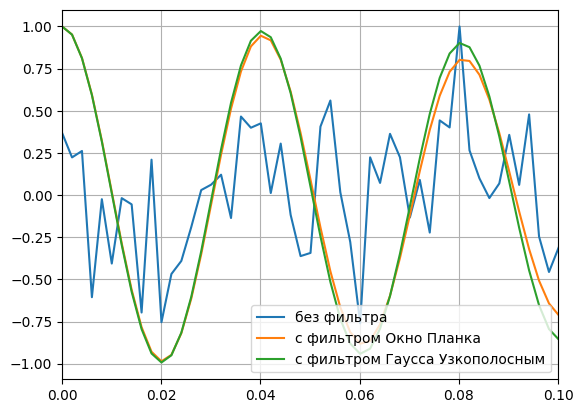

In [137]:
x = np.linspace(0.0, 2*N*T, N)


yfff = ifft(yff)
yfff= yfff/np.max(yfff)

y =  np.abs(yff) * np.abs(yf_plank)
yflt = ifft(y)
yflt= yflt/np.max(yflt)

y =  np.abs(yff) * np.abs(yf_gauss)

#plt.plot(x,yn, label= 'оригинал')
plt.plot(x, yfff, label= 'без фильтра')
plt.plot(x, yflt, label= 'с фильтром Окно Планка')
plt.plot(x, yflt2, label= 'с фильтром Гаусса Узкополосным')
plt.xlim(0, 0.1)
plt.legend()
plt.grid()